<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

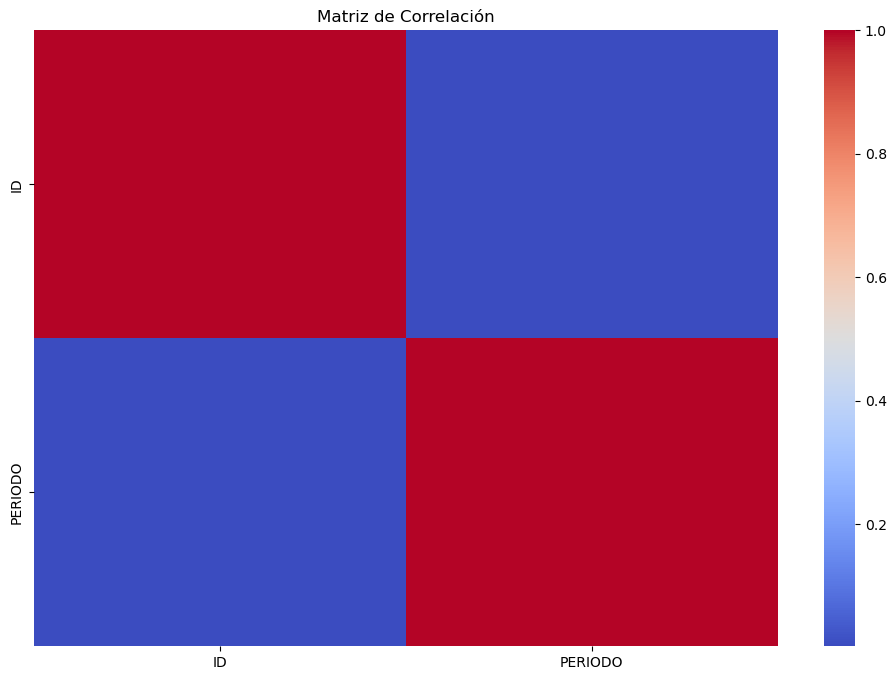

In [1]:
# Importar librerías necesarias para el análisis de datos y preprocesamiento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV
train_data = pd.read_csv('train.csv')

# Mostrar información básica del DataFrame (estructura y valores nulos)
print(train_data.info())
print(train_data.head())

#Imputación de valores faltantes en columnas categóricas
#Rellenar valores faltantes en columnas categóricas con el valor más frecuente (moda)
categorical_columns = [
    'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO'
]

for column in categorical_columns:
    # Reemplazar valores faltantes en cada columna con su moda y reasignar la columna al DataFrame
    mode_value = train_data[column].mode()[0]
    train_data[column] = train_data[column].fillna(mode_value)

# Verificar que los valores faltantes hayan sido imputados
print("Valores faltantes después de imputación en columnas categóricas:")
print(train_data.isnull().sum())

# Codificación de variables categóricas
# Convertir variables categóricas en variables numéricas para su uso en modelos
train_data = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)

# Normalización de valores numéricos
# Escalar columnas numéricas para tener valores en la misma escala
from sklearn.preprocessing import StandardScaler

numeric_columns = ['PERIODO']  # Seleccionamos columnas numéricas relevantes
scaler = StandardScaler()
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

# Verificación del DataFrame preprocesado
# Visualizar las primeras filas para confirmar el preprocesamiento
print(train_data.head())

# Visualización de la matriz de correlación para ver relaciones entre variables numéricas
# Seleccionamos solo las columnas numéricas para evitar errores
numeric_data = train_data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [2]:
# Transformarmos rendimiento global en una variable numérica
rendimiento_mapping = {'bajo': 1, 'medio-bajo': 2, 'medio-alto': 3, 'alto': 4}
train_data['RENDIMIENTO_GLOBAL'] = train_data['RENDIMIENTO_GLOBAL'].map(rendimiento_mapping)

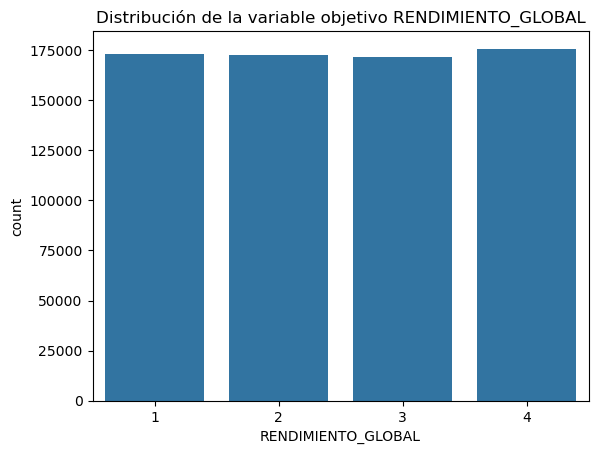

In [3]:
# Visualización de la distribución de RENDIMIENTO_GLOBAL
sns.countplot(x='RENDIMIENTO_GLOBAL', data=train_data)
plt.title('Distribución de la variable objetivo RENDIMIENTO_GLOBAL')
plt.show()

Valores faltantes en cada columna después de la primera imputación:
ID                                                                         0
PERIODO                                                                    0
ESTU_PRGM_ACADEMICO                                                        0
ESTU_PRGM_DEPARTAMENTO                                                     0
RENDIMIENTO_GLOBAL                                                         0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones    0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones    0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones    0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón           0
ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil                            0
ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones                           0
ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula                           0
ESTU_HOR

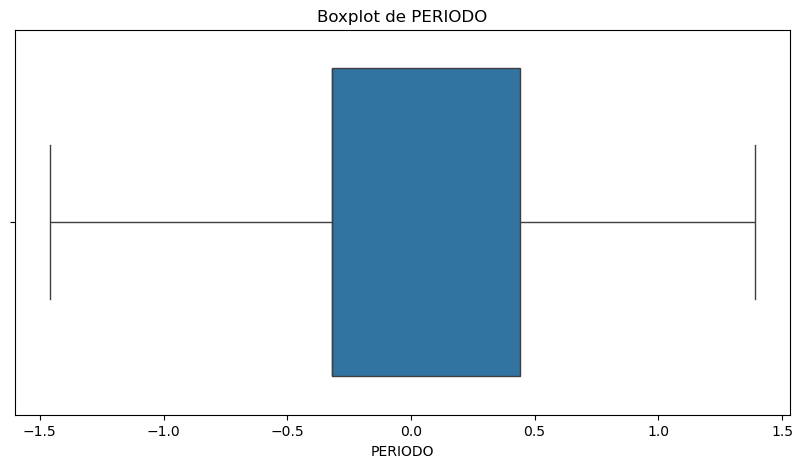

Datos después de normalización de variables numéricas adicionales:
       ID   PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256  1.294094                  ENFERMERIA                 BOGOTÁ   
1  645256  1.294094                     DERECHO              ATLANTICO   
2  308367  0.439801       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353 -0.319570  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032  1.294094                  PSICOLOGIA              ANTIOQUIA   

   RENDIMIENTO_GLOBAL  \
0            0.441343   
1           -1.342682   
2           -1.342682   
3            1.333356   
4           -0.450669   

   ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones  \
0                                              False                         
1                                               True                         
2                                               True                         
3                        

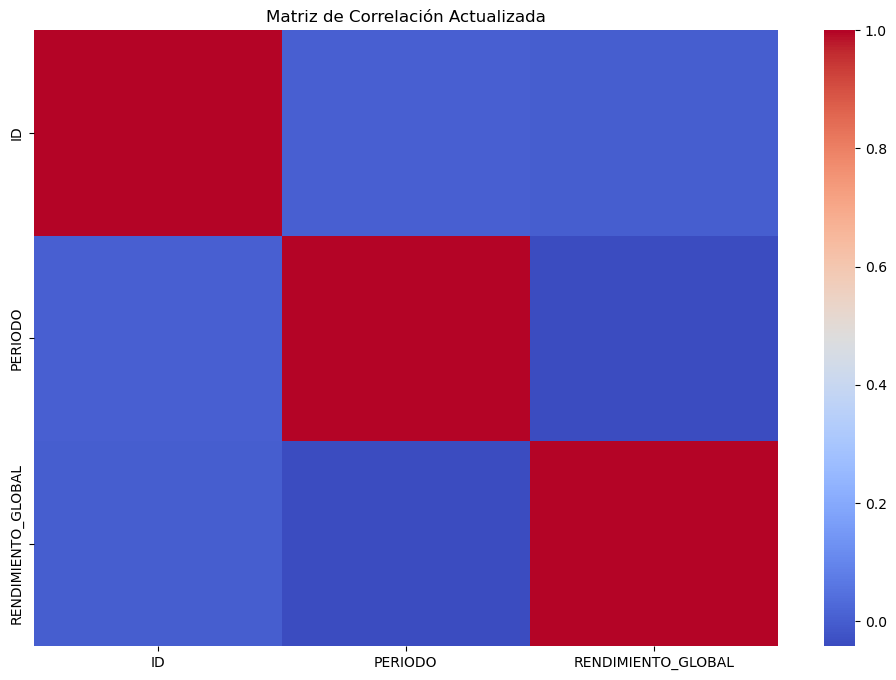

In [4]:
# Verificar valores faltantes en todas las columnas después de la imputación
print("Valores faltantes en cada columna después de la primera imputación:")
print(train_data.isnull().sum())

# Detección y Manejo de Valores Atípicos (Outliers) en la variable 'PERIODO'
# Visualizamos 'PERIODO' con un boxplot para identificar posibles valores atípicos
plt.figure(figsize=(10, 5))
sns.boxplot(x=train_data['PERIODO'])
plt.title('Boxplot de PERIODO')
plt.show()

# Codificación de variables categóricas ordinales (si no se hizo antes)
# Aquí transformamos la variable 'FAMI_ESTRATOVIVIENDA' en una escala ordinal, ya que tiene un orden lógico

estrato_mapping = {'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6}
if 'FAMI_ESTRATOVIVIENDA' in train_data.columns:  # Verificar si ya existe
    train_data['FAMI_ESTRATOVIVIENDA'] = train_data['FAMI_ESTRATOVIVIENDA'].map(estrato_mapping)

# Normalización de otras variables numéricas restantes
# Ya normalizamos 'PERIODO', así que seleccionamos otras columnas numéricas adicionales si es necesario
# Escalamos las columnas numéricas para asegurar que estén en la misma escala

from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas adicionales que no sean ID ni PERIODO
numeric_columns = [col for col in train_data.select_dtypes(include=[np.number]).columns if col not in ['ID', 'PERIODO']]
scaler = StandardScaler()
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

# Verificar los datos después de la estandarización
print("Datos después de normalización de variables numéricas adicionales:")
print(train_data.head())

# Visualización de la matriz de correlación solo con columnas numéricas
numeric_data = train_data.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Matriz de Correlación Actualizada")
plt.show()
